## Logistical regression

In [82]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

jedostavan primer

In [46]:
X=np.arange(0,101,4)

In [47]:
X

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100])

In [48]:
Y=np.where(X>50,1,0)

In [73]:
Y[16]=0

In [74]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [75]:
w=0
b=0
#y=wx+b

In [76]:
def forward (X,w,b):
    H=w*X+b
    return H

In [77]:
def sigmoid (H):
    S=1/(1+np.exp(-H))
    return S

In [78]:
def loss(Y,S):
    L=((S-Y)**2).mean() 
    return L    

In [79]:
def gradient(X,Y,S):
    dw,db=(X*(S-Y)).mean(),(S-Y).mean()
    return dw,db

In [80]:
learning_rate=0.01
num_iters=10000

In [81]:
for epoch in range(num_iters):
    H=forward(X,w,b)
    S=sigmoid(H)
    L=loss(Y,S)
    dw,db=gradient(X,Y,S)
    w-=learning_rate*dw
    b-=learning_rate*db
    if epoch%100==0:
        print(f"epoch: {epoch+1}, loss={L:.4f}, b={b:.4f}, w{w:.4f}") 

epoch: 1, loss=0.2500, b=-0.0004, w0.1054
epoch: 101, loss=0.4731, b=-0.2296, w0.1239
epoch: 201, loss=0.2114, b=-0.4485, w0.1135
epoch: 301, loss=0.2052, b=-0.6615, w0.1296
epoch: 401, loss=0.3759, b=-0.8729, w-0.0077
epoch: 501, loss=0.4506, b=-1.0655, w0.1479
epoch: 601, loss=0.3832, b=-1.2530, w0.0233
epoch: 701, loss=0.3763, b=-1.4303, w0.0278
epoch: 801, loss=0.3695, b=-1.5993, w0.0317
epoch: 901, loss=0.3626, b=-1.7614, w0.0349
epoch: 1001, loss=0.3555, b=-1.9176, w0.0375
epoch: 1101, loss=0.3486, b=-2.0687, w0.0398
epoch: 1201, loss=0.3417, b=-2.2151, w0.0419
epoch: 1301, loss=0.3347, b=-2.3582, w0.0436
epoch: 1401, loss=0.3293, b=-2.4966, w0.0464
epoch: 1501, loss=0.3222, b=-2.6317, w0.0477
epoch: 1601, loss=0.3142, b=-2.7632, w0.0481
epoch: 1701, loss=0.1202, b=-2.8913, w0.1548
epoch: 1801, loss=0.1571, b=-3.0170, w0.1943
epoch: 1901, loss=0.3887, b=-3.1359, w0.1665
epoch: 2001, loss=0.1134, b=-3.2478, w0.1561
epoch: 2101, loss=0.2520, b=-3.3582, w0.0398
epoch: 2201, loss=0.1

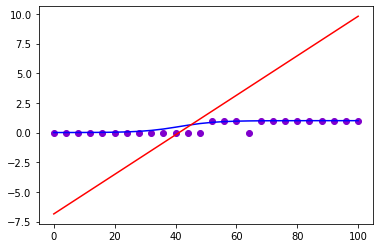

In [83]:
plt.scatter(X,Y,color=(0.5,0,0.8))
plt.plot(X,S,"b")
plt.plot(X,H,"r")
plt.show()

# Real data

In [83]:
bc=datasets.load_breast_cancer()

In [26]:
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [59]:
for key in bc:
    print (key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [84]:
X=bc["data"]
Y=bc["target"]

In [85]:
num_samples,num_features=X.shape

In [62]:
num_samples

569

In [63]:
num_features

30

In [64]:
Y.shape

(569,)

In [65]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [67]:
X_train[0]

array([1.799e+01, 2.066e+01, 1.178e+02, 9.917e+02, 1.036e-01, 1.304e-01,
       1.201e-01, 8.824e-02, 1.992e-01, 6.069e-02, 4.537e-01, 8.733e-01,
       3.061e+00, 4.981e+01, 7.231e-03, 2.772e-02, 2.509e-02, 1.480e-02,
       1.414e-02, 3.336e-03, 2.108e+01, 2.541e+01, 1.381e+02, 1.349e+03,
       1.482e-01, 3.735e-01, 3.301e-01, 1.974e-01, 3.060e-01, 8.503e-02])

From scratch

In [16]:
#u ovom slucaju Y=w1*x1+w2*x2...w30*x30+b
W=np.zeros(num_features)
b=0

In [17]:
W

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
def forward (X,W,b):
    H=np.dot(X,W)+b
    return H

In [19]:
def sigmoid (H):
    S=1/(1+np.exp(-H))
    return S

In [20]:
def loss(Y,S):
    L=((S-Y)**2).mean() 
    return L   

In [21]:
def gradient(X,Y,S):
    dW,db=(1/num_samples)*(np.dot((S-Y),X)),(S-Y).mean()
    return dW,db

In [22]:
def predict(S):
    T=[1 if i > 0.5 else 0 for i in S]
    return T

In [23]:
def accuracy(T,Y_test):
    accuracy=np.sum(T==Y_test)/len(T)
    return round(accuracy,4)

In [171]:
learning_rate=0.001
num_iters=7000

In [24]:
for epoch in range(num_iters):
    H=forward(X_train,W,b)
    S=sigmoid(H)
    L=loss(Y_train,S)
    dW,db=gradient(X_train,Y_train,S)
    W-=learning_rate*dW
    b-=learning_rate*db
    if epoch%1000==0:
        print(f"epoch: {epoch+1}, loss={L:.4f}, b={b:.4f}, W={W}") 

NameError: name 'num_iters' is not defined

In [173]:
H_test=forward(X_test,W,b)

In [174]:
S_test=sigmoid(H_test)

In [175]:
T=predict(S_test)

In [176]:
T

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1]

In [177]:
print("Logistic regression model accuracy: ",accuracy(T,Y_test))

Logistic regression model accuracy:  0.9386


## Pytorch version

In [88]:
sc=StandardScaler() #konstrujisemo objekat klase stscalar

In [89]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [70]:
X_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [90]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [72]:
Y_test

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
      

In [91]:
class LogisticRegression(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.linear=nn.Linear(num_features,1)
    def forward(self,X):
        S=torch.sigmoid(self.linear(X))
        return S

In [92]:
model=LogisticRegression(num_features)

In [93]:
loss=nn.BCELoss() #da vidimo koliko je dobar 

In [94]:
learning_rate=0.01
num_epochs=100000

In [95]:
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) #stohastic gradient disant

In [96]:
for epoch in range(num_epochs):
    S=model(X_train)
    L=loss(S,Y_train)
    L.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch%10000==0:
        print(f"epoch: {epoch+1}, loss={L:.4f}") 

epoch: 1, loss=0.7965
epoch: 10001, loss=0.0596
epoch: 20001, loss=0.0536
epoch: 30001, loss=0.0506
epoch: 40001, loss=0.0487
epoch: 50001, loss=0.0473
epoch: 60001, loss=0.0462
epoch: 70001, loss=0.0453
epoch: 80001, loss=0.0445
epoch: 90001, loss=0.0438


In [97]:
with torch.no_grad():
    T=model(X_test)

In [100]:
T

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
      

In [99]:
T=T.round()

In [101]:
tf=T.eq(Y_test)

In [102]:
tf

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True

In [103]:
accuracy=tf.sum()/Y_test.shape[0]

In [104]:
print (f'accuracy: {accuracy:.4f}')

accuracy: 0.9737
